In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel("demographics.xlsx")
df.head()

,subject,scan-number,HC-AUD-match,subject-group,Study,Diagnosis,Age,age-subject-group,Sex,AUDIT-Total,MMSE
0,002_S_4171,1,NaN,AD-MCI,ADNI,MCI,69.0,elderly,M,NaN,24.0
1,002_S_4229,1,NaN,AD-MCI,ADNI,MCI,66.0,elderly,M,NaN,29.0
2,002_S_4473,1,NaN,AD-MCI,ADNI,MCI,75.0,elderly,M,NaN,27.0
3,002_S_4521,1,NaN,AD-MCI,ADNI,MCI,70.0,elderly,M,NaN,27.0
4,002_S_4799,1,NaN,AD-MCI,ADNI,MCI,68.0,elderly,M,NaN,29.0


In [2]:
df.isna().sum()

subject                0
scan-number            0
HC-AUD-match         261
subject-group          0
Study                  0
Diagnosis              0
Age                    2
age-subject-group      2
Sex                    0
AUDIT-Total          287
MMSE                 264
dtype: int64

In [3]:
df

,subject,scan-number,HC-AUD-match,subject-group,Study,Diagnosis,Age,age-subject-group,Sex,AUDIT-Total,MMSE
0,002_S_4171,1,NaN,AD-MCI,ADNI,MCI,69.00,elderly,M,NaN,24.0
1,002_S_4229,1,NaN,AD-MCI,ADNI,MCI,66.00,elderly,M,NaN,29.0
2,002_S_4473,1,NaN,AD-MCI,ADNI,MCI,75.00,elderly,M,NaN,27.0
3,002_S_4521,1,NaN,AD-MCI,ADNI,MCI,70.00,elderly,M,NaN,27.0
4,002_S_4799,1,NaN,AD-MCI,ADNI,MCI,68.00,elderly,M,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...
310,1125R2,2,NaN,HC,IAM,HC,63.07,mid-life,F,NaN,NaN
311,1126R2,2,NaN,HC,IAM,HC,76.70,elderly,M,NaN,NaN
312,1127R2,2,NaN,HC,IAM,HC,56.98,mid-life,F,NaN,NaN
313,1128R2,2,NaN,HC,IAM,HC,55.37,mid-life,M,NaN,NaN


In [4]:
df.dtypes

subject               object
scan-number            int64
HC-AUD-match         float64
subject-group         object
Study                 object
Diagnosis             object
Age                  float64
age-subject-group     object
Sex                   object
AUDIT-Total          float64
MMSE                 float64
dtype: object

In [5]:
df.apply(lambda x: sum(x.isnull()),axis=0)

subject                0
scan-number            0
HC-AUD-match         261
subject-group          0
Study                  0
Diagnosis              0
Age                    2
age-subject-group      2
Sex                    0
AUDIT-Total          287
MMSE                 264
dtype: int64

In [6]:
import numpy as np
temp_df = df.drop(labels=['HC-AUD-match','AUDIT-Total','MMSE'],axis='columns')
new_df = temp_df.dropna(axis='index',how='any')

In [7]:
new_df.isna().sum()

subject              0
scan-number          0
subject-group        0
Study                0
Diagnosis            0
Age                  0
age-subject-group    0
Sex                  0
dtype: int64

In [8]:
df['Study'].value_counts()

IAM               236
ADNI               51
PATRIOT            11
COUPLES             7
PANACEA             6
PATRIOT-prelim      3
HEART               1
Name: Study, dtype: int64

In [9]:
df['Study'].unique()

array(['ADNI', 'HEART', 'COUPLES', 'PANACEA', 'PATRIOT-prelim', 'PATRIOT',
       'IAM'], dtype=object)

In [10]:
df['Diagnosis'].unique()

array(['MCI', 'AD', 'AUD', 'HC'], dtype=object)

In [11]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [12]:
df['subject-group'].value_counts()

HC        248
AD-MCI     39
AUD        28
Name: subject-group, dtype: int64

In [13]:
df['age-subject-group'].value_counts()

elderly     163
mid-life    150
Name: age-subject-group, dtype: int64

In [14]:
new_df.dtypes

subject               object
scan-number            int64
subject-group         object
Study                 object
Diagnosis             object
Age                  float64
age-subject-group     object
Sex                   object
dtype: object

In [15]:
# Splitting traing data
X = df.iloc[:, 1: 7].values
y = df.iloc[:, 7].values

In [16]:
X

array([[1, nan, 'AD-MCI', 'ADNI', 'MCI', 69.0],
       [1, nan, 'AD-MCI', 'ADNI', 'MCI', 66.0],
       [1, nan, 'AD-MCI', 'ADNI', 'MCI', 75.0],
       ...,
       [2, nan, 'HC', 'IAM', 'HC', 56.98],
       [2, nan, 'HC', 'IAM', 'HC', 55.37],
       [2, nan, 'HC', 'IAM', 'HC', nan]], dtype=object)

In [17]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

E:\anaconda\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
E:\anaconda\lib\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,scan-number,HC-AUD-match,Age,AUDIT-Total,MMSE
scan-number,1.000000,nan,0.014381,nan,nan
HC-AUD-match,nan,nan,nan,nan,nan
Age,0.014381,nan,1.000000,-0.068360,-0.177275
AUDIT-Total,nan,nan,-0.068360,1.000000,nan
MMSE,nan,nan,-0.177275,nan,1.000000


In [18]:
y

array(['elderly', 'elderly', 'elderly', 'elderly', 'elderly', 'elderly',
       'elderly', 'elderly', 'elderly', 'elderly', 'elderly', 'elderly',
       'elderly', 'mid-life', 'elderly', 'elderly', 'elderly', 'elderly',
       'mid-life', 'elderly', 'elderly', 'elderly', 'elderly', 'elderly',
       'mid-life', 'mid-life', 'elderly', 'mid-life', 'elderly',
       'elderly', 'elderly', 'elderly', 'elderly', 'elderly', 'elderly',
       'elderly', 'elderly', 'mid-life', 'elderly', 'mid-life',
       'mid-life', 'mid-life', 'mid-life', 'mid-life', 'mid-life',
       'mid-life', 'mid-life', 'mid-life', 'mid-life', 'mid-life',
       'mid-life', 'mid-life', 'mid-life', 'mid-life', 'mid-life',
       'mid-life', 'mid-life', 'mid-life', 'mid-life', 'mid-life',
       'mid-life', 'mid-life', 'mid-life', 'mid-life', 'mid-life',
       'mid-life', 'mid-life', 'elderly', 'elderly', 'elderly', 'elderly',
       'elderly', 'elderly', 'elderly', 'elderly', 'elderly', 'elderly',
       'mid-life', 'm

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [20]:
X_train

array([[1, nan, 'HC', 'IAM', 'HC', 47.04],
       [1, 1.0, 'HC', 'IAM', 'HC', 56.98],
       [1, nan, 'AD-MCI', 'ADNI', 'AD', 74.0],
       ...,
       [1, nan, 'HC', 'IAM', 'HC', 67.75],
       [1, 1.0, 'AUD', 'PANACEA', 'AUD', 57.0],
       [1, nan, 'HC', 'IAM', 'HC', 83.32]], dtype=object)

In [21]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [22]:
for i in range(0, 5):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

X_train[:,5] = labelencoder_X.fit_transform(X_train[:,5])

In [23]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [24]:
X_train

array([[0, 1, 2, 3, 2, 4],
       [0, 0, 2, 3, 2, 27],
       [0, 1, 0, 0, 0, 97],
       ...,
       [0, 1, 2, 3, 2, 74],
       [0, 0, 1, 4, 1, 28],
       [0, 1, 2, 3, 2, 120]], dtype=object)

In [25]:
y_train

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [26]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
for i in range(0, 5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])
X_test[:,5] = labelencoder_X.fit_transform(X_test[:,5])
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [27]:
X_test

array([[0, 0, 1, 4, 1, 26],
       [1, 1, 2, 2, 2, 84],
       [0, 0, 2, 2, 2, 19],
       [0, 1, 2, 2, 2, 68],
       [0, 1, 2, 2, 2, 76],
       [1, 1, 2, 2, 2, 6],
       [0, 1, 2, 2, 2, 80],
       [0, 1, 2, 2, 2, 71],
       [0, 1, 2, 0, 2, 74],
       [1, 1, 2, 2, 2, 47],
       [0, 1, 0, 0, 3, 60],
       [1, 1, 2, 2, 2, 41],
       [0, 0, 1, 3, 1, 10],
       [1, 1, 2, 2, 2, 46],
       [0, 0, 2, 2, 2, 4],
       [0, 1, 2, 2, 2, 56],
       [0, 1, 2, 2, 2, 61],
       [1, 1, 2, 2, 2, 54],
       [0, 1, 0, 0, 0, 70],
       [1, 1, 2, 2, 2, 33],
       [1, 1, 2, 2, 2, 14],
       [0, 0, 1, 4, 1, 9],
       [1, 1, 2, 2, 2, 44],
       [0, 1, 0, 0, 0, 79],
       [0, 1, 2, 2, 2, 0],
       [0, 1, 0, 0, 3, 45],
       [0, 1, 2, 2, 2, 63],
       [0, 1, 0, 0, 0, 74],
       [0, 0, 1, 5, 1, 37],
       [0, 1, 0, 0, 0, 66],
       [0, 0, 2, 2, 2, 13],
       [0, 1, 2, 2, 2, 48],
       [0, 0, 2, 2, 2, 5],
       [1, 1, 2, 2, 2, 28],
       [0, 1, 2, 2, 2, 82],
       [1, 1, 2, 2, 2, 73

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.33598774 0.32409659]


OUTLIERS REMOVAL HERE

In [30]:

import pandas as pd
import numpy as np

df = pd.DataFrame(columns=['scan-number', 'Age'])  # create an empty DataFrame

# populate the DataFrame with some random data
for i in range(100):
    df.loc[i] = [np.random.randint(1, 100), np.random.randint(20, 80)]

for col_name in ['scan-number', 'Age']:
    col_mean = np.mean(df[col_name])
    col_std = np.std(df[col_name])
    cut_off = col_std * 3
    lower, upper = col_mean - cut_off, col_mean + cut_off
    print(lower, upper)
    df = df[(df[col_name] > lower) & (df[col_name] < upper)]  # remove outliers
    outliers_removed = [df.iloc[x] for x in range(len(df)) if (df[col_name].iloc[x] > lower) and (df[col_name].iloc[x] < upper)]




-36.169299893280915 137.08929989328092
-0.0766483375326601 95.09664833753266


In [31]:
new_df.describe()

,scan-number,Age
count,313.000000,313.000000
mean,1.373802,65.703003
std,0.484587,9.781700
min,1.000000,45.000000
25%,1.000000,58.020000
50%,1.000000,66.750000
75%,2.000000,73.000000
max,2.000000,84.660000


In [32]:
new_df.corr()

,scan-number,Age
scan-number,1.000000,0.014381
Age,0.014381,1.000000


In [33]:
new_df.dtypes

subject               object
scan-number            int64
subject-group         object
Study                 object
Diagnosis             object
Age                  float64
age-subject-group     object
Sex                   object
dtype: object

In [34]:
new_df

,subject,scan-number,subject-group,Study,Diagnosis,Age,age-subject-group,Sex
0,002_S_4171,1,AD-MCI,ADNI,MCI,69.00,elderly,M
1,002_S_4229,1,AD-MCI,ADNI,MCI,66.00,elderly,M
2,002_S_4473,1,AD-MCI,ADNI,MCI,75.00,elderly,M
3,002_S_4521,1,AD-MCI,ADNI,MCI,70.00,elderly,M
4,002_S_4799,1,AD-MCI,ADNI,MCI,68.00,elderly,M
...,...,...,...,...,...,...,...,...
309,1124R2,2,HC,IAM,HC,62.85,mid-life,M
310,1125R2,2,HC,IAM,HC,63.07,mid-life,F
311,1126R2,2,HC,IAM,HC,76.70,elderly,M
312,1127R2,2,HC,IAM,HC,56.98,mid-life,F


(array([12., 23., 27., 36., 50., 31., 52., 40., 21., 21.]),
 array([45.   , 48.966, 52.932, 56.898, 60.864, 64.83 , 68.796, 72.762,
        76.728, 80.694, 84.66 ]),
 <BarContainer object of 10 artists>)

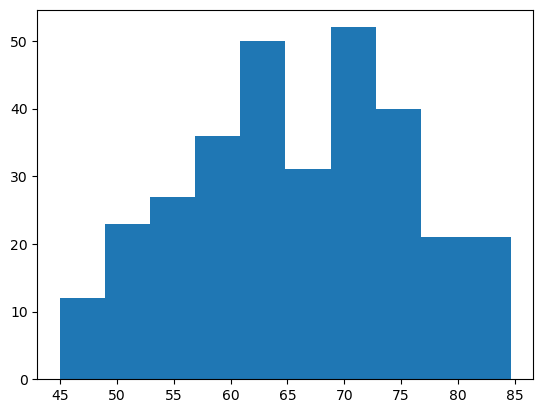

In [35]:
import matplotlib.pyplot as plt
plt.hist(new_df['Age'])

(array([196.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 117.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

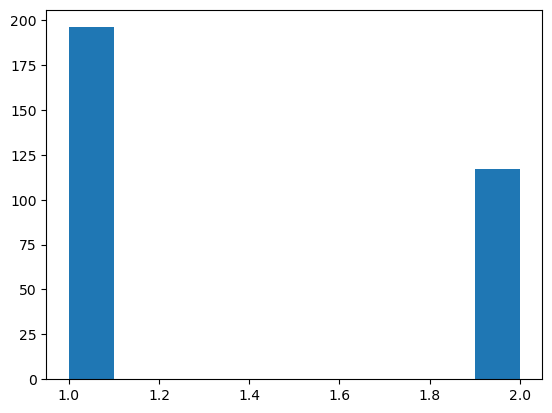

In [36]:
plt.hist(new_df['scan-number'])

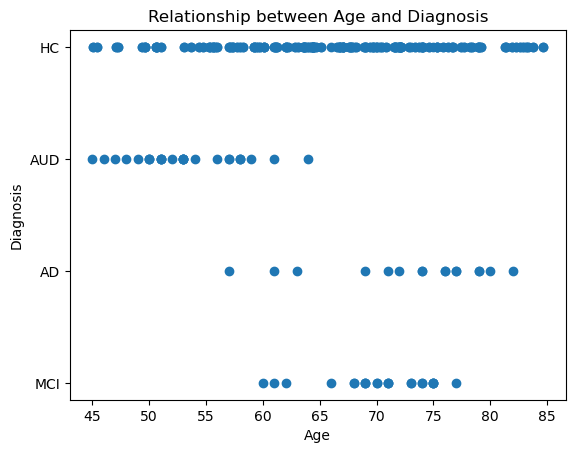

       Age Diagnosis
0    69.00       MCI
1    66.00       MCI
2    75.00       MCI
3    70.00       MCI
4    68.00       MCI
..     ...       ...
309  62.85        HC
310  63.07        HC
311  76.70        HC
312  56.98        HC
313  55.37        HC

[313 rows x 2 columns]


In [37]:

plt.scatter(new_df['Age'], new_df['Diagnosis'])
plt.xlabel('Age')
plt.ylabel('Diagnosis')
plt.title('Relationship between Age and Diagnosis')
plt.show()
print(new_df[['Age', 'Diagnosis']])

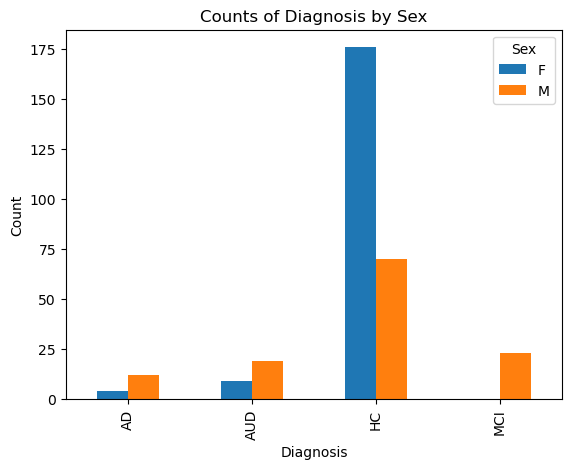

Sex            F     M
Diagnosis             
AD           4.0  12.0
AUD          9.0  19.0
HC         176.0  70.0
MCI          NaN  23.0


In [38]:
import matplotlib.pyplot as plt

# create a pivot table with counts of Diagnosis by Sex
sex_pivot = new_df.pivot_table(index='Diagnosis', columns='Sex', values='Age', aggfunc='count')

# plot the bar chart
sex_pivot.plot(kind='bar')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Counts of Diagnosis by Sex')
plt.show()

# print the pivot table
print(sex_pivot)


In [39]:
data = pd.read_excel("demographics.xlsx")

## models

### DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Load data
df = new_df

# Filter the data to only include AD-MCI, HC, and AUD patients
df = df[df["Diagnosis"].isin(["MCI", "AD", "HC", "AUD"])]

# Map the diagnosis categories to numerical values, where MCI or AUD is mapped to 1 and HC is mapped to 0
diagnosis_mapping = {"MCI": 1, "AD": 1, "HC": 0, "AUD": 1}
df["Diagnosis"] = df["Diagnosis"].map(diagnosis_mapping)

# Split the subject-group column into MCI and AUD columns
df[["MCI", "AUD"]] = df["subject-group"].str.split("-", expand=True)

# One-hot encode the categorical features
enc = OneHotEncoder(handle_unknown='ignore')
X_encoded = enc.fit_transform(df[["Sex"]])

# Merge the one-hot encoded features with the numerical features
X = pd.concat([
    df[["Age"]].reset_index(drop=True), 
    pd.DataFrame(X_encoded.toarray())
], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, df["Diagnosis"], test_size=0.3, random_state=0
)

# Create the decision tree classifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Evaluate the model
accuracy = dt.score(X_test, y_test)

test_error_rate = 1 - accuracy
# Evaluate the model
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Test error rate:", test_error_rate)
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

# Tune hyperparameters
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 5, 10, 15, 20]}
grid = GridSearchCV(dt, param_grid, cv=10)
grid.fit(X_train, y_train)
print("Best hyperparameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Accuracy: 0.7978723404255319
Test error rate: 0.2021276595744681
Precision: 0.7902828230409963
Recall: 0.7978723404255319
F1 score: 0.7710642867751507
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1}
Best accuracy: 0.8766233766233767


In [41]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[66  3]
 [16  9]]


In [42]:
for gender in ["M", "F"]:
    for age in range(45, 86):
        # One-hot encode the gender feature
        gender_encoded = enc.transform([[gender]])
        
        # Merge the one-hot encoded features with the numerical features
        X_new = pd.concat([
            pd.DataFrame([[age]], columns=["Age"]).reset_index(drop=True),
            pd.DataFrame(gender_encoded.toarray())
        ], axis=1)
        
        # Make a prediction on the new data
        y_pred_new = dt.predict(X_new)
        
        # Print the prediction
        if y_pred_new[0] == 1:
            print(f"Predicted diagnosis for a {gender} patient aged {age}: Alzheimer's")
        else:
            print(f"Predicted diagnosis for a {gender} patient aged {age}: Not Alzheimer's")


Predicted diagnosis for a M patient aged 45: Alzheimer's
Predicted diagnosis for a M patient aged 46: Alzheimer's
Predicted diagnosis for a M patient aged 47: Alzheimer's
Predicted diagnosis for a M patient aged 48: Alzheimer's
Predicted diagnosis for a M patient aged 49: Alzheimer's
Predicted diagnosis for a M patient aged 50: Alzheimer's
Predicted diagnosis for a M patient aged 51: Not Alzheimer's
Predicted diagnosis for a M patient aged 52: Alzheimer's
Predicted diagnosis for a M patient aged 53: Alzheimer's
Predicted diagnosis for a M patient aged 54: Alzheimer's
Predicted diagnosis for a M patient aged 55: Not Alzheimer's
Predicted diagnosis for a M patient aged 56: Not Alzheimer's
Predicted diagnosis for a M patient aged 57: Not Alzheimer's
Predicted diagnosis for a M patient aged 58: Alzheimer's
Predicted diagnosis for a M patient aged 59: Not Alzheimer's
Predicted diagnosis for a M patient aged 60: Alzheimer's
Predicted diagnosis for a M patient aged 61: Alzheimer's
Predicted d

In [43]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[66  3]
 [16  9]]


In [44]:
# Load new data
new_data = new_df

# One-hot encode the categorical features
X_encoded_new = enc.transform(new_data[["Sex"]])

# Merge the one-hot encoded features with the numerical features
X_new = pd.concat([
    new_data[["Age"]].reset_index(drop=True), 
    pd.DataFrame(X_encoded_new.toarray())
], axis=1)

# Make predictions on the new data using the decision tree
y_pred_new = dt.predict(X_new)

# Create a table of predictions
predictions_table = pd.DataFrame({
    "Patient": range(1, len(new_data)+1),
    "Age": new_data["Age"],
    "Sex": new_data["Sex"],
    "Prediction": ["Alzheimer's" if pred == 1 else "Not Alzheimer's" for pred in y_pred_new]
})

# Print the table of predictions
print(predictions_table)


     Patient    Age Sex       Prediction
0          1  69.00   M      Alzheimer's
1          2  66.00   M  Not Alzheimer's
2          3  75.00   M      Alzheimer's
3          4  70.00   M      Alzheimer's
4          5  68.00   M      Alzheimer's
..       ...    ...  ..              ...
309      309  62.85   M  Not Alzheimer's
310      310  63.07   F  Not Alzheimer's
311      311  76.70   M  Not Alzheimer's
312      312  56.98   F  Not Alzheimer's
313      313  55.37   M  Not Alzheimer's

[313 rows x 4 columns]


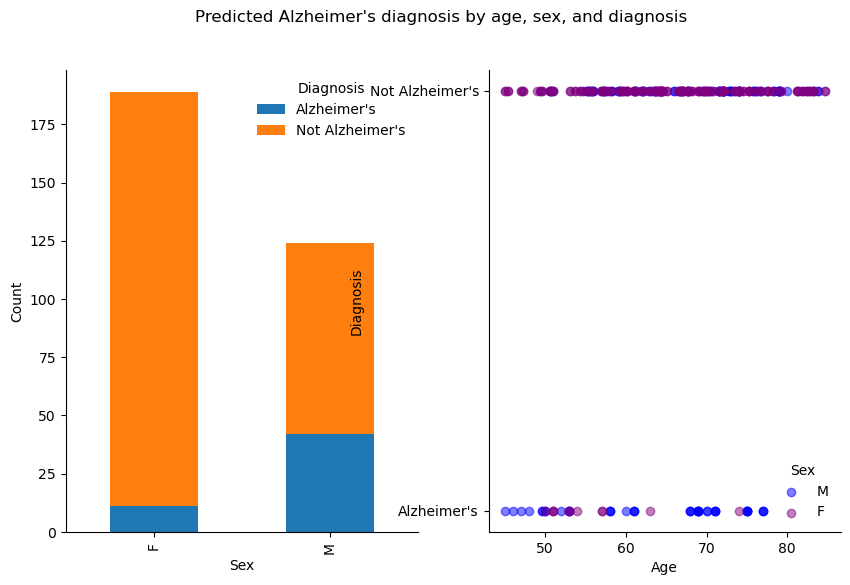

In [45]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot a bar chart of the diagnosis by sex
diagnosis_by_sex = predictions_table.groupby(['Sex', 'Prediction']).size().unstack()
diagnosis_by_sex.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Sex')
ax1.set_ylabel('Count')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', direction='out')
ax1.legend(title='Diagnosis', frameon=False)

# Plot a scatterplot of age by diagnosis, colored by sex
colors = {'M': 'blue', 'F': 'purple'}
for sex, color in colors.items():
    ax2.scatter(predictions_table[predictions_table['Sex'] == sex]['Age'], 
                predictions_table[predictions_table['Sex'] == sex]['Prediction'], 
                color=color, alpha=0.5, label=sex)
ax2.set_xlabel('Age')
ax2.set_ylabel('Diagnosis')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', direction='out')
ax2.legend(title='Sex', frameon=False)



plt.suptitle('Predicted Alzheimer\'s diagnosis by age, sex, and diagnosis')
plt.show()



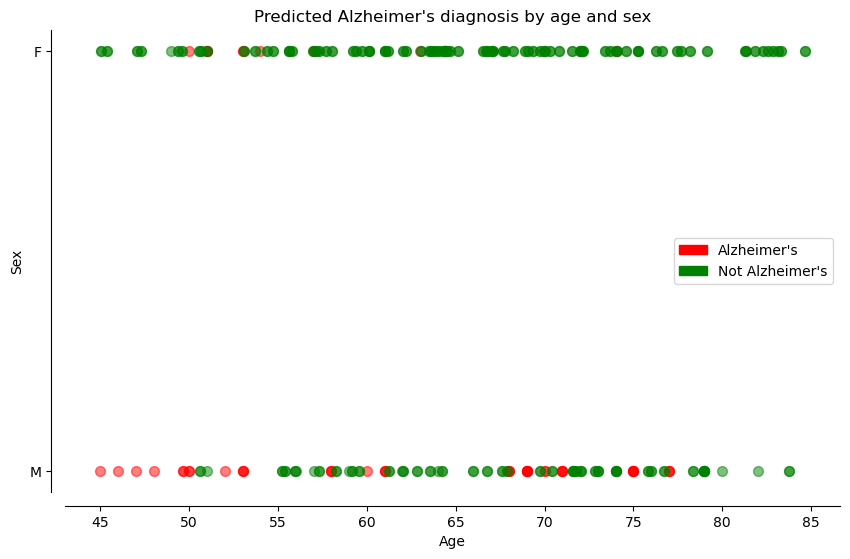

In [46]:

# Create a scatter plot of the predictions
fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Alzheimer\'s': 'red', 'Not Alzheimer\'s': 'green'}
for i, row in predictions_table.iterrows():
    ax.scatter(row['Age'], row['Sex'], color=colors[row['Prediction']], alpha=0.5, s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Sex')
ax.set_title('Predicted Alzheimer\'s diagnosis by age and sex')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['left'].set_position(('outward', 10))
ax.tick_params(axis='both', direction='out')
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors], 
           labels=list(colors.keys()))
plt.show()


# Logisitc regression


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Load data
df = new_df

# Filter the data to only include AD-MCI, HC, and AUD patients
df = df[df["Diagnosis"].isin(["MCI", "AD", "HC", "AUD"])]

# Map the diagnosis categories to numerical values, where MCI or AUD is mapped to 1 and HC is mapped to 0
diagnosis_mapping = {"MCI": 1, "AD": 1, "HC": 0, "AUD": 1}
df["Diagnosis"] = df["Diagnosis"].map(diagnosis_mapping)

# Split the subject-group column into MCI and AUD columns
df[["MCI", "AUD"]] = df["subject-group"].str.split("-", expand=True)

# One-hot encode the categorical features
enc = OneHotEncoder(handle_unknown='ignore')
X_encoded = enc.fit_transform(df[["Sex"]])

# Merge the one-hot encoded features with the numerical features
X = pd.concat([
    df[["Age"]].reset_index(drop=True), 
    pd.DataFrame(X_encoded.toarray())
], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, df["Diagnosis"], test_size=0.3, random_state=0
)

# Create the logistic regression model
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
lr.fit(X_train, y_train)

# Evaluate the model
accuracy = lr.score(X_test, y_test)

test_error_rate = 1 - accuracy
# Evaluate the model
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Test error rate:", test_error_rate)
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

# Tune hyperparameters
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=10)
grid.fit(X_train, y_train)
print("Best hyperparameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

Accuracy: 0.7446808510638298
Test error rate: 0.25531914893617025
Precision: 0.7090807954387428
Recall: 0.7446808510638298
F1 score: 0.6978690896087643
Best hyperparameters: {'C': 0.1}
Best accuracy: 0.8218614718614718


In [48]:
import numpy as np

# Define a function to predict the diagnosis for a given patient
def predict_diagnosis(age, sex):
    # One-hot encode the categorical features for the new patient
    new_patient_encoded = enc.transform(np.array([[sex]]))

    # Merge the one-hot encoded features with the numerical features for the new patient
    new_patient_features = np.concatenate([
        np.array([[age]]),
        new_patient_encoded.toarray()
    ], axis=1)

    # Use the trained model to make a prediction for the new patient
    new_patient_prediction = lr.predict(new_patient_features)

    # Map the numerical diagnosis category back to a string label
    diagnosis_mapping = {0: "Not Alzheimer's", 1: "Alzheimer's", 2: "Not Alzheimer's", 3: "Not Alzheimer's"}
    predicted_diagnosis = diagnosis_mapping[new_patient_prediction[0]]

    return predicted_diagnosis

# Predict the diagnosis for a range of ages and both genders
for sex in ["M", "F"]:
    for age in range(45, 86):
        diagnosis = predict_diagnosis(age, sex)
        print(f"Predicted diagnosis for a {sex} patient aged {age}: {diagnosis}")

Predicted diagnosis for a M patient aged 45: Alzheimer's
Predicted diagnosis for a M patient aged 46: Alzheimer's
Predicted diagnosis for a M patient aged 47: Alzheimer's
Predicted diagnosis for a M patient aged 48: Alzheimer's
Predicted diagnosis for a M patient aged 49: Alzheimer's
Predicted diagnosis for a M patient aged 50: Alzheimer's
Predicted diagnosis for a M patient aged 51: Alzheimer's
Predicted diagnosis for a M patient aged 52: Alzheimer's
Predicted diagnosis for a M patient aged 53: Alzheimer's
Predicted diagnosis for a M patient aged 54: Alzheimer's
Predicted diagnosis for a M patient aged 55: Alzheimer's
Predicted diagnosis for a M patient aged 56: Alzheimer's
Predicted diagnosis for a M patient aged 57: Not Alzheimer's
Predicted diagnosis for a M patient aged 58: Not Alzheimer's
Predicted diagnosis for a M patient aged 59: Not Alzheimer's
Predicted diagnosis for a M patient aged 60: Not Alzheimer's
Predicted diagnosis for a M patient aged 61: Not Alzheimer's
Predicted d

In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [50]:
cm

array([[65,  4],
       [20,  5]], dtype=int64)

In [51]:
len(new_data["Age"])

313

In [52]:
len(new_data["Sex"])

313

In [53]:
len(range(1, len(new_data)+1))

313

In [54]:
# Load new data
new_data = new_df

from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the new data using the trained model
y_pred_new = model.predict(X_new)

# Create a table of predictions
predictions_table = pd.DataFrame({
    "Patient": range(1, len(new_data)+1),
    "Age": new_data["Age"],
    "Sex": new_data["Sex"],
    "Prediction": ["Alzheimer's" if pred == 1 else "Not Alzheimer's" for pred in y_pred_new]
})

# Print the table of predictions
print(predictions_table)

     Patient    Age Sex       Prediction
0          1  69.00   M  Not Alzheimer's
1          2  66.00   M  Not Alzheimer's
2          3  75.00   M  Not Alzheimer's
3          4  70.00   M  Not Alzheimer's
4          5  68.00   M  Not Alzheimer's
..       ...    ...  ..              ...
309      309  62.85   M  Not Alzheimer's
310      310  63.07   F  Not Alzheimer's
311      311  76.70   M  Not Alzheimer's
312      312  56.98   F  Not Alzheimer's
313      313  55.37   M      Alzheimer's

[313 rows x 4 columns]


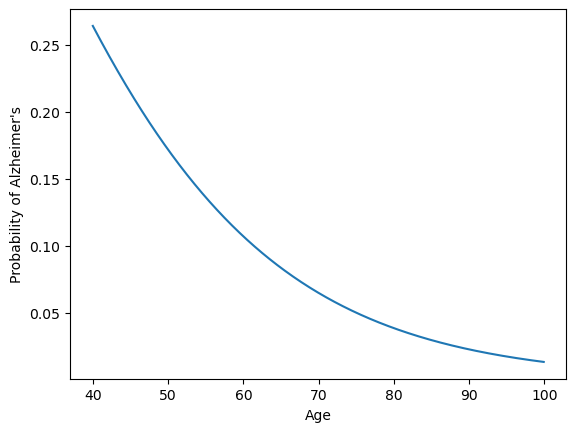

In [55]:
import matplotlib.pyplot as plt

# Extract the coefficients and intercept from the logistic regression model
coef = model.coef_[0]
intercept = model.intercept_[0]

# Define a range of ages for which to generate predicted probabilities
ages = np.arange(40, 100, 0.1)

# Calculate the log-odds for each age
log_odds = intercept + coef[0]*ages + coef[1]

# Convert the log-odds to probabilities using the logistic function
probs = 1 / (1 + np.exp(-log_odds))

# Plot the logistic regression curve
plt.plot(ages, probs)
plt.xlabel("Age")
plt.ylabel("Probability of Alzheimer's")
plt.show()


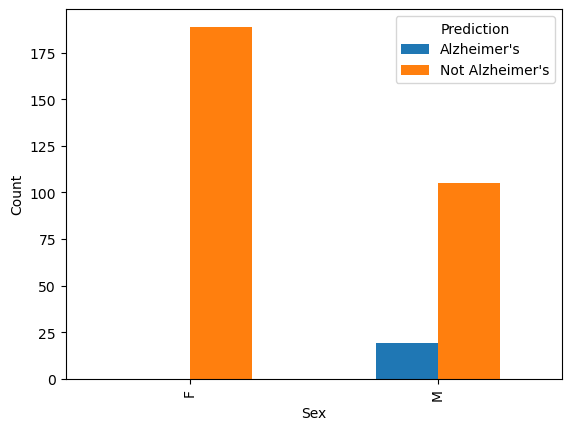

In [56]:
import matplotlib.pyplot as plt

# Group the data by sex and prediction
grouped_data = predictions_table.groupby(['Sex', 'Prediction']).size().reset_index(name='Count')

# Create a pivot table with the counts
pivot_table = grouped_data.pivot(index='Sex', columns='Prediction', values='Count')

# Plot the bar graph
ax = pivot_table.plot(kind='bar')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
plt.show()


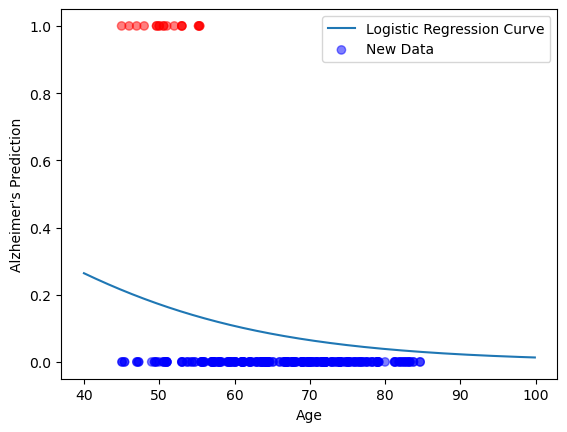

In [57]:
import matplotlib.pyplot as plt

# Extract the coefficients and intercept from the logistic regression model
coef = model.coef_[0]
intercept = model.intercept_[0]

# Define a range of ages for which to generate predicted probabilities
ages = np.arange(40, 100, 0.1)

# Calculate the log-odds for each age
log_odds = intercept + coef[0]*ages + coef[1]

# Convert the log-odds to probabilities using the logistic function
probs = 1 / (1 + np.exp(-log_odds))

# Plot the logistic regression curve
plt.plot(ages, probs, label="Logistic Regression Curve")

# Scatter plot of the new data
colors = ["red" if pred == 1 else "blue" for pred in y_pred_new]
plt.scatter(new_data["Age"], y_pred_new, color=colors, alpha=0.5, label="New Data")

plt.xlabel("Age")
plt.ylabel("Alzheimer's Prediction")
plt.legend()
plt.show()


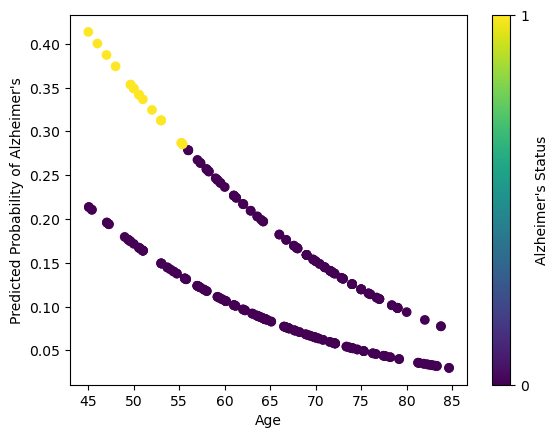

In [58]:
import matplotlib.pyplot as plt

def predict_prob(age, sex):
    if sex == "M":
        sex_val = 0
    else:
        sex_val = 1
    log_odds = intercept + coef[0]*age + coef[1]*sex_val
    return 1 / (1 + np.exp(-log_odds))

# Extract the coefficients and intercept from the logistic regression model
coef = model.coef_[0]
intercept = model.intercept_[0]



# Create a scatter plot of predicted probabilities vs. age, color-coded by Alzheimer's status
plt.scatter(new_data["Age"], [predict_prob(age, sex) for age, sex in zip(new_data["Age"], new_data["Sex"])], c=y_pred_new)
plt.xlabel("Age")
plt.ylabel("Predicted Probability of Alzheimer's")
plt.colorbar(ticks=[0, 1], label="Alzheimer's Status")
plt.show()


# Naive Bayes

In [59]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [60]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [61]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1], dtype=int64)

In [62]:
from sklearn.naive_bayes import GaussianNB

# Load data
df = new_df

# Filter the data to only include AD-MCI, HC, and AUD patients
df = df[df["Diagnosis"].isin(["MCI", "AD", "HC", "AUD"])]

# Map the diagnosis categories to numerical values, where MCI or AUD is mapped to 1 and HC is mapped to 0
diagnosis_mapping = {"MCI": 1, "AD": 1, "HC": 0, "AUD": 1}
df["Diagnosis"] = df["Diagnosis"].map(diagnosis_mapping)

# Split the subject-group column into MCI and AUD columns
df[["MCI", "AUD"]] = df["subject-group"].str.split("-", expand=True)

# One-hot encode the categorical features
enc = OneHotEncoder(handle_unknown='ignore')
X_encoded = enc.fit_transform(df[["Sex"]])

# Merge the one-hot encoded features with the numerical features
X = pd.concat([
    df[["Age"]].reset_index(drop=True), 
    pd.DataFrame(X_encoded.toarray())
], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, df["Diagnosis"], test_size=0.3, random_state=0
)

# Create the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Evaluate the model
accuracy = gnb.score(X_test, y_test)

test_error_rate = 1 - accuracy

# Evaluate the model
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Test error rate:", test_error_rate)
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

# No hyperparameters to tune for Gaussian Naive Bayes
print("Best hyperparameters: None")
print("Best accuracy:", accuracy)


Accuracy: 0.7659574468085106
Test error rate: 0.23404255319148937
Precision: 0.8609060645534808
Recall: 0.7659574468085106
F1 score: 0.7795579825871929
Best hyperparameters: None
Best accuracy: 0.7659574468085106


In [63]:
# Preprocess the data
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
X = df[['Age', 'Sex']]
y = df['Diagnosis']
gnb = GaussianNB()

# Train the Naive Bayes model
gnb.fit(X, y)

# Define a function to predict the diagnosis for a given patient
def predict_diagnosis(age, sex):
    new_patient_features = [[age, sex]]
    new_patient_prediction = gnb.predict(new_patient_features)
    diagnosis_mapping = {0: "Not Alzheimer's", 1: "Alzheimer's", 2: "Not Alzheimer's", 3: "Not Alzheimer's"}
    predicted_diagnosis = diagnosis_mapping[new_patient_prediction[0]]

    return predicted_diagnosis

# Predict the diagnosis for a range of ages and both genders
for sex in ["M", "F"]:
    for age in range(45, 86):
        sex_encoded = le.transform([sex])[0]
        diagnosis = predict_diagnosis(age, sex_encoded)
        print(f"Predicted diagnosis for a {sex} patient aged {age}: {diagnosis}")


Predicted diagnosis for a M patient aged 45: Alzheimer's
Predicted diagnosis for a M patient aged 46: Alzheimer's
Predicted diagnosis for a M patient aged 47: Alzheimer's
Predicted diagnosis for a M patient aged 48: Alzheimer's
Predicted diagnosis for a M patient aged 49: Alzheimer's
Predicted diagnosis for a M patient aged 50: Alzheimer's
Predicted diagnosis for a M patient aged 51: Alzheimer's
Predicted diagnosis for a M patient aged 52: Alzheimer's
Predicted diagnosis for a M patient aged 53: Alzheimer's
Predicted diagnosis for a M patient aged 54: Alzheimer's
Predicted diagnosis for a M patient aged 55: Alzheimer's
Predicted diagnosis for a M patient aged 56: Alzheimer's
Predicted diagnosis for a M patient aged 57: Alzheimer's
Predicted diagnosis for a M patient aged 58: Alzheimer's
Predicted diagnosis for a M patient aged 59: Alzheimer's
Predicted diagnosis for a M patient aged 60: Alzheimer's
Predicted diagnosis for a M patient aged 61: Not Alzheimer's
Predicted diagnosis for a M

In [64]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[48 21]
 [ 1 24]]


In [65]:
new_df.reset_index(drop=True, inplace=True)

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Split data into features (X) and target (y) variables
X = new_df[["Age", "Sex"]]
y = new_df["Diagnosis"]

# One-hot encode "Sex" column
enc = OneHotEncoder(handle_unknown="ignore")
X_encoded = enc.fit_transform(X[["Sex"]])
X = pd.concat([X[["Age"]], pd.DataFrame(X_encoded.toarray())], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train classifier on training data
gnb.fit(X_train, y_train)

# Make predictions on test data
y_pred = gnb.predict(X_test)

# Create prediction DataFrame
prediction_df = pd.DataFrame({
    "Age": X_test["Age"],
    "Sex": X_test[X_test.columns[1:]].idxmax(axis=1),
    "Diagnosis": y_test,
    "Predicted Diagnosis": y_pred
})

# Print prediction DataFrame
print(prediction_df)


       Age  Sex Diagnosis Predicted Diagnosis
65   61.00    1       AUD                 MCI
253  71.60    1        HC                 MCI
208  72.00    0        HC                  HC
156  55.23    1        HC                 MCI
108  81.26    0        HC                  HC
..     ...  ...       ...                 ...
256  83.15    0        HC                  HC
199  64.31    0        HC                  HC
89   67.04    0        HC                  HC
137  63.51    0        HC                  HC
27   62.00    1       MCI                 MCI

[94 rows x 4 columns]


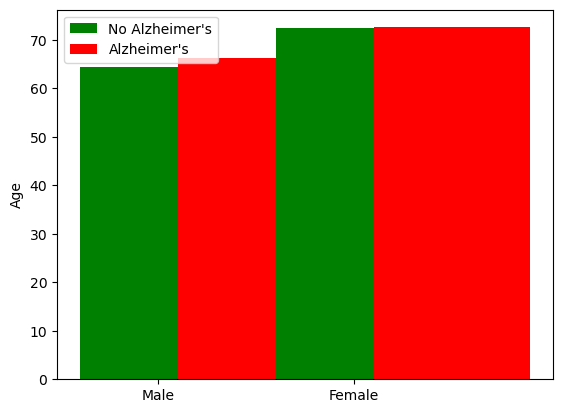

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
ages = np.random.randint(50, 90, size=100)
sexes = np.random.choice(['Male', 'Female'], size=100)
alzheimer = np.random.choice([True, False], size=100)

# Define the labels and colors for Alzheimer's status
labels = ['No Alzheimer\'s', 'Alzheimer\'s']
colors = ['g', 'r']

# Group the data by sex and Alzheimer's status
data = [(age, alz) for age, sex, alz in zip(ages, sexes, alzheimer)]
grouped_data = {}
for sex in ['Male', 'Female']:
    grouped_data[sex] = {}
    for alz, label, color in zip([False, True], labels, colors):
        grouped_data[sex][label] = [d[0] for d in data if d[1] == alz and sexes[d[0]] == sex]

# Create the bar plot
fig, ax = plt.subplots()
for i, sex in enumerate(['Male', 'Female']):
    for j, label in enumerate(labels):
        x = i + j/len(labels)
        y = np.mean(grouped_data[sex][label])
        ax.bar(x, y, color=colors[j], label=label if i==0 else None)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'])
ax.set_ylabel('Age')
ax.legend()
plt.show()


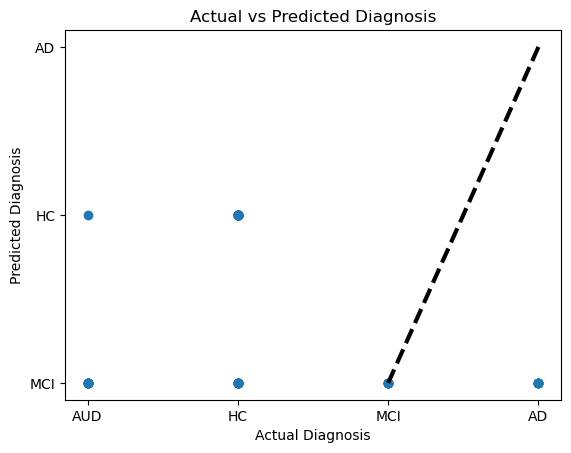

In [69]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)

# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)

# Set the x and y axis labels
plt.xlabel('Actual Diagnosis')
plt.ylabel('Predicted Diagnosis')

# Set the title of the plot
plt.title('Actual vs Predicted Diagnosis')

# Show the plot
plt.show()


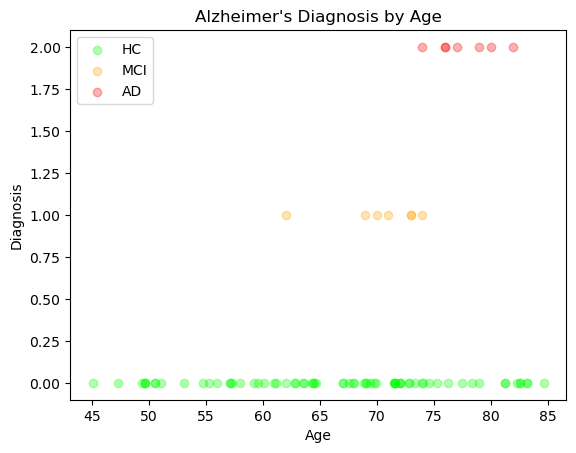

In [70]:
import matplotlib.pyplot as plt

# Plot Age vs. Diagnosis
plt.title("Alzheimer's Diagnosis by Age")
plt.xlabel("Age")
plt.ylabel("Diagnosis")
plt.scatter(prediction_df["Age"][prediction_df["Diagnosis"]=="HC"], [0]*len(prediction_df[prediction_df["Diagnosis"]=="HC"]), color="lime", label="HC", alpha=0.3)
plt.scatter(prediction_df["Age"][prediction_df["Diagnosis"]=="MCI"], [1]*len(prediction_df[prediction_df["Diagnosis"]=="MCI"]), color="orange", label="MCI", alpha=0.3)
plt.scatter(prediction_df["Age"][prediction_df["Diagnosis"]=="AD"], [2]*len(prediction_df[prediction_df["Diagnosis"]=="AD"]), color="red", label="AD", alpha=0.3)
plt.legend()
plt.show()
